In [26]:
import numpy as np
import pandas as pd

df= pd.read_csv("/Users/prathamsharma/Desktop/ML_Dataset/Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [27]:
df = df[["Age","EstimatedSalary","Purchased"]]
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [28]:
x= df.iloc[:,0:-1]
y=df.iloc[:,-1]

print(x.shape,y.shape)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x))
print(x.head(5))

(400, 2) (400,)
          0         1
0 -1.781797 -1.490046
1 -0.253587 -1.460681
2 -1.113206 -0.785290
3 -1.017692 -0.374182
4 -1.781797  0.183751


In [29]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train ,y_test = train_test_split(x,y,random_state=2, test_size= 0.2)
print(x_train.shape , x_test.shape , y_train.shape ,y_test.shape)

(320, 2) (80, 2) (320,) (80,)


In [30]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense


model = Sequential()

model.add(Dense(10,activation="relu",input_dim= 2))
model.add(Dense(10,activation="relu"))
model.add(Dense(1,activation="sigmoid",))
model.summary()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 151 (604.00 B)

 Trainable params: 151 (604.00 B)

 Non-trainable params: 0 (0.00 B)

In [31]:
model.compile(loss="binary_crossentropy",metrics=["accuracy"])

history = model.fit(x_train,y_train,epochs=10,batch_size=320,validation_split=0.2) # since number of rows = batch sixe =320 thus its batch Gradient Decent 

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step - accuracy: 0.2227 - loss: 0.7710 - val_accuracy: 0.3281 - val_loss: 0.7589
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.2500 - loss: 0.7639 - val_accuracy: 0.3750 - val_loss: 0.7543
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.3242 - loss: 0.7588 - val_accuracy: 0.3906 - val_loss: 0.7504
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.3750 - loss: 0.7545 - val_accuracy: 0.4219 - val_loss: 0.7469
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4180 - loss: 0.7506 - val_accuracy: 0.4688 - val_loss: 0.7436
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4453 - loss: 0.7469 - val_accuracy: 0.5000 - val_loss: 0.7406
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4648 - loss: 0.7436 - val_accuracy: 0.5156 - val_loss: 0.7379
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4688 - loss: 0.7404 - val_accuracy: 0.5156 - val_loss: 0.7352

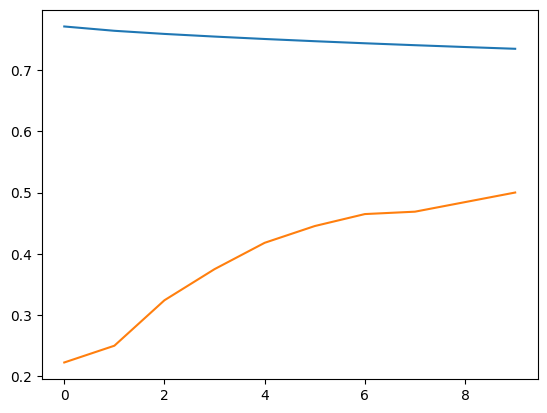

In [32]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"])
plt.plot(history.history["accuracy"])